In [10]:
import sys
print("Python version: {}".format(sys.version))

import pandas as pd
print("pandas version: {}".format(pd.__version__))

import matplotlib
print("matplotlib version: {}".format(matplotlib.__version__))

import numpy as np
print("numpy version: {}".format(np.__version__))

import scipy as sp
print("scipy version: {}".format(sp.__version__))

import IPython
print("IPython version: {}".format(IPython.__version__))

import sklearn
print("scikit-learn version: {}".format(sklearn.__version__))

import matplotlib.pyplot as plt
from IPython import display
import mglearn

Python version: 2.7.10 (default, Jul 15 2017, 17:16:57) 
[GCC 4.2.1 Compatible Apple LLVM 9.0.0 (clang-900.0.31)]
pandas version: 0.23.3
matplotlib version: 2.2.2
numpy version: 1.14.5
scipy version: 1.1.0
IPython version: 5.7.0
scikit-learn version: 0.19.2


X.shape: (26, 2)


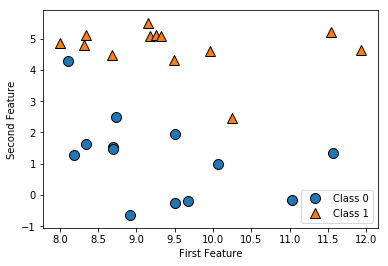

In [11]:
import sklearn

X, y = mglearn.datasets.make_forge()

mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(["Class 0", "Class 1"], loc=4)
plt.xlabel("First Feature")
plt.ylabel("Second Feature")
print("X.shape: {}".format(X.shape))

Text(0,0.5,'Target')

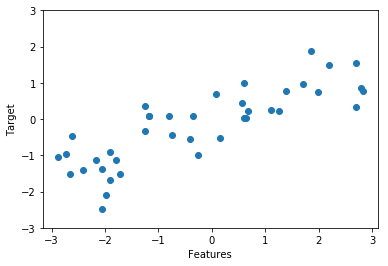

In [14]:
X, y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X, y, 'o')
plt.ylim(-3, 3)
plt.xlabel("Features")
plt.ylabel("Target")

In [15]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print("cancer.keys(): \n{}".format(cancer.keys()))

cancer.keys(): 
['target_names', 'data', 'target', 'DESCR', 'feature_names']


In [16]:
print("shape of breast cancer data: {}".format(cancer.data.shape))

shape of breast cancer data: (569, 30)


In [18]:
print("sample numbers of each class:\n{}".format({n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))}))

sample numbers of each class:
{'benign': 357, 'malignant': 212}


In [19]:
print("Feature name:\n{}".format(cancer.feature_names))

Feature name:
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


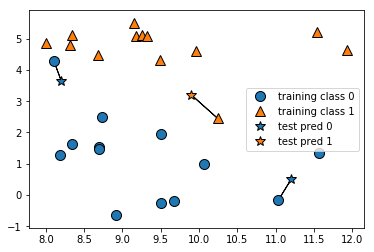

In [21]:
# k-NN algorithm
mglearn.plots.plot_knn_classification(n_neighbors=1)

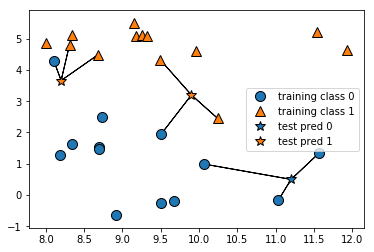

In [22]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

In [23]:
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_forge()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [24]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

In [26]:
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [29]:
print("predict test set: {}".format(clf.predict(X_test)))

predict test set: [1 0 1 0 1 0 0]


In [30]:
print("Accuracy of test set: {}".format(clf.score(X_test, y_test)))

Accuracy of test set: 0.857142857143


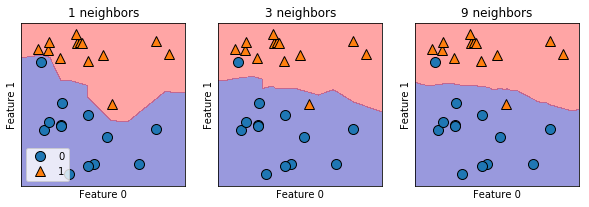

In [31]:
fig, axes = plt.subplots(1, 3, figsize=(10, 3))

for n_neighbors, ax in zip([1, 3, 9], axes):
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{} neighbors".format(n_neighbors))
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
axes[0].legend(loc=3)

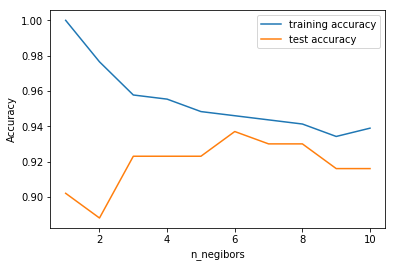

In [33]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=66)

training_accuracy = []
test_accuracy = []
# 1에서 10까지 n_neighbors 적용
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
    # 모델 생성
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    # save accuracy of train set
    training_accuracy.append(clf.score(X_train, y_train))
    # save generalization accuracy
    test_accuracy.append(clf.score(X_test, y_test))

plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_negibors")
plt.legend()

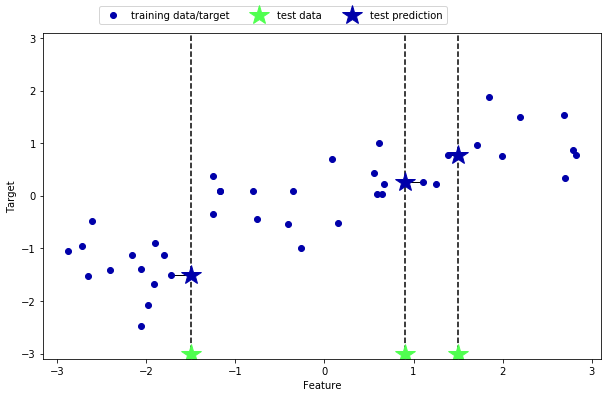

In [34]:
# Regression
mglearn.plots.plot_knn_regression(n_neighbors=1)

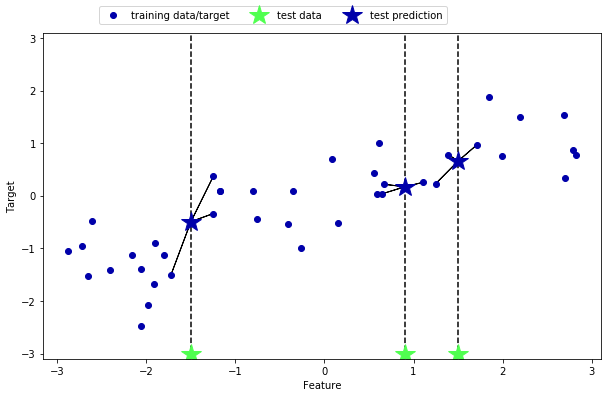

In [35]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

In [36]:
from sklearn.neighbors import KNeighborsRegressor

X, y = mglearn.datasets.make_wave(n_samples=40)

# split wave dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# 이웃의 수를 3으로 하여 모델의 객체를 생성
reg = KNeighborsRegressor(n_neighbors=3)
# 훈련 데이터와 타깃을 사용해 모델을 학습
reg.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=3, p=2,
          weights='uniform')

In [37]:
print("predict test set:\n{}".format(reg.predict(X_test)))

predict test set:
[-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]


In [38]:
print("test set R^2: {:.2f}".format(reg.score(X_test, y_test)))

test set R^2: 0.83


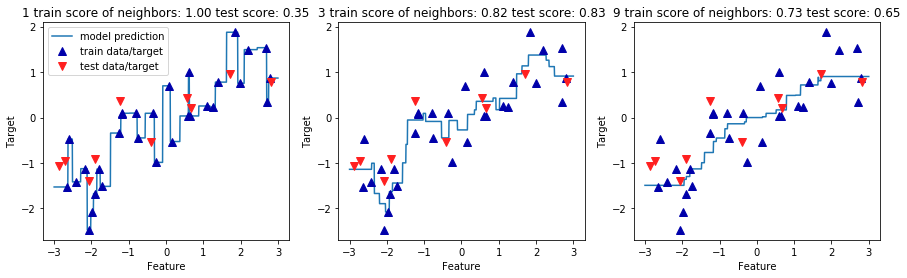

In [40]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
# make 1000 data points in (-3, 3)
line = np.linspace(-3, 3, 1000).reshape(-1, 1)
for n_neighbors, ax in zip([1, 3, 9], axes):
    #predict using 1, 3, 9 neighbors
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)
    
    ax.set_title(
        "{} train score of neighbors: {:.2f} test score: {:.2f}".format(
            n_neighbors, reg.score(X_train, y_train),
            reg.score(X_test, y_test)))
    ax.set_xlabel("Feature")
    ax.set_ylabel("Target")
axes[0].legend(["model prediction", "train data/target", "test data/target"], loc="best")

# Linear Regression

/Users/Jmmmmu/tensorflow/lib/python2.7/site-packages/sklearn/linear_model/base.py:509: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  linalg.lstsq(X, y)


w[0]: 0.393906  b: -0.031804


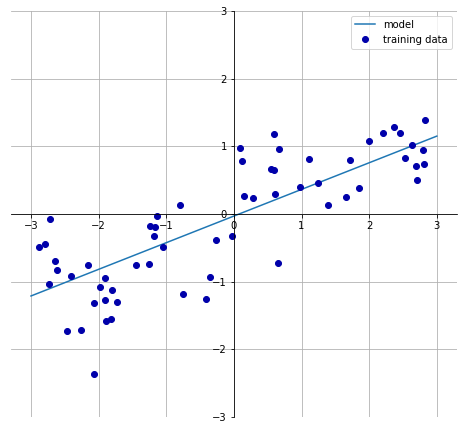

In [42]:
mglearn.plots.plot_linear_regression_wave()

In [44]:
from sklearn.linear_model import LinearRegression
X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

lr = LinearRegression().fit(X_train, y_train)

In [45]:
print("lr.coef_: {}".format(lr.coef_))
print("lr.intercept_: {}".format(lr.intercept_))

lr.coef_: [0.39390555]
lr.intercept_: -0.0318043430268


In [46]:
print("train set score: {:.2f}".format(lr.score(X_train, y_train)))
print("test set score: {:.2f}".format(lr.score(X_test, y_test)))

train set score: 0.67
test set score: 0.66


In [47]:
X, y = mglearn.datasets.load_extended_boston()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)

In [48]:
print("train set score: {:.2f}".format(lr.score(X_train, y_train)))
print("test set score: {:.2f}".format(lr.score(X_test, y_test)))

train set score: 0.95
test set score: 0.61


# Ridge Regression

In [50]:
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train, y_train)
print("train set score: {:.2f}".format(ridge.score(X_train, y_train)))
print("test set score: {:.2f}".format(ridge.score(X_test, y_test)))

train set score: 0.89
test set score: 0.75


In [52]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("train set score: {:.2f}".format(ridge10.score(X_train, y_train)))
print("test set score: {:.2f}".format(ridge10.score(X_test, y_test)))

train set score: 0.79
test set score: 0.64


In [54]:
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print("train set score: {:.2f}".format(ridge01.score(X_train, y_train)))
print("test set score: {:.2f}".format(ridge01.score(X_test, y_test)))

train set score: 0.93
test set score: 0.77


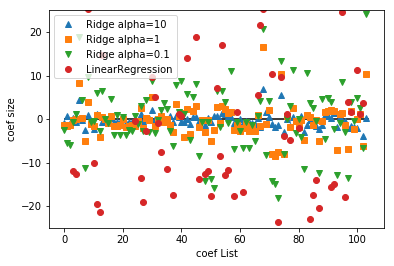

In [62]:
plt.plot(ridge10.coef_, '^', label="Ridge alpha=10")
plt.plot(ridge.coef_, 's', label="Ridge alpha=1")
plt.plot(ridge01.coef_, 'v', label="Ridge alpha=0.1")

plt.plot(lr.coef_, 'o', label="LinearRegression")
plt.xlabel("coef List")
plt.ylabel("coef size")
plt.hlines(0, 0, len(lr.coef_))
plt.ylim(-25, 25)
plt.legend()

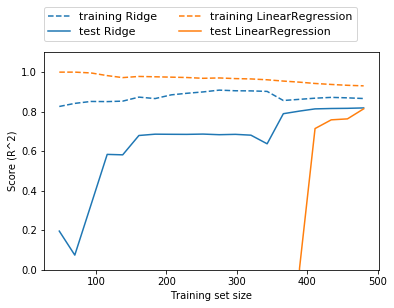

In [61]:
mglearn.plots.plot_ridge_n_samples()